# Titanic `Survived` Predict  
AUTHOR: SungwookLE  
DATE: '21.6/21  
PROBLEM: Classifier [Kaggle LINK](https://www.kaggle.com/c/titanic)  
REFERENCE:  
- [#1 LECTURE](https://www.youtube.com/watch?v=aqp_9HV58Ls&list=RDCMUCxP77kNgVfiiG6CXZ5WMuAQ&index=3)  
- [#2 LECTURE](https://www.youtube.com/watch?v=nXFXAxfdIls&list=PLVNY1HnUlO25B-8Gwn1mS35SD0yMHh147&index=3)  
- [#3 LECTURE](https://www.youtube.com/watch?v=FAP7JOECfEE&list=RDCMUCxP77kNgVfiiG6CXZ5WMuAQ&index=1)  

- **The Challenge**  
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

- **Given Data**  
The data has been split into two groups:  
- training set (train.csv)
- test set (test.csv)  

- **Data Dictionary**  

    ||||
    |:--|:--|:--|
    |Variable|Definition|Key|
    |survival|Survival|0 = No, 1 = Yes|
    |pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
    |sex|Sex||
    |Age|Age in years||	
    |sibsp|# of siblings / spouses aboard the Titanic||
    |parch|# of parents / children aboard the Titanic||
    |ticket|Ticket number||
    |fare|Passenger fare||
    |cabin|Cabin number||
    |embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

- **Variable Notes**  
    pclass: A proxy for socio-economic status (SES)  
    1st = Upper  
    2nd = Middle  
    3rd = Lower  
    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  
    sibsp: The dataset defines family relations in this way...  
    Sibling = brother, sister, stepbrother, stepsister  
    Spouse = husband, wife (mistresses and fiancés were ignored)  
    parch: The dataset defines family relations in this way...  
    Parent = mother, father  
    Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.  

![image](https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w)

### OVERVIEW
1) Data Analysis
- 데이터 차원, 형태 파악하기
- 그래프 그려서 에측변수 `SalePrice`와 다른 변수와의 상관관계 파악하기

2) Feature Engineering  
2-1) categorical + numerical features 분리하기
- using `select_dtypes()`.    
- numerical 데이터 중 month나 year 등의 데이터는 categorical로 분류해주기 `apply(str)`  
      
2-2) 비어있는 missing 데이터 채우기  
- numerical: mean, median, mode 를 활용하여 데이터 채우기 `.fillna(xxx)`, `mean(), median(), mode()`
- categorical: `pd.get_dummies()` 나 `LabelEncoder`를 활용해서 missing 데이터도 없애고, one-hot encoding도 완성하기

2-3) data의 skewness 줄이기 
- numerical data 의 skewness 줄이기  

2-4) new feature / del feature
- 필요하다면

3) Modeling
- CrossValidation using `cross_val_score, KFold. train_test_split`.          
- Regressor : `LinearRegression, RidgeCV, LassoCV, ElasticNetCV` 
- Classifier  : `KNN, RandomForest, ...`
- Techniques: `StandardScaler, RobustScaler`.
- Easy modeling: `make_pipeline`

## START

## 1. Data Analysis
- 데이터 차원, 형태 파악하기
- 그래프 그려서 에측변수 `SalePrice`와 다른 변수와의 상관관계 파악하기

In [1]:
from subprocess import check_output
import pandas as pd

print(check_output(["ls","input"]).decode('utf8'))

test.csv
train.csv



In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [3]:
print("Initial train data shape is {}".format(train.shape))
n_train = train.shape[0]
train.head(3)

Initial train data shape is (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
print("Initial test data shape is {}".format(test.shape))
n_test = test.shape[0]
test.head(3)

Initial test data shape is (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
all_data = pd.concat([train,test],axis=0).reset_index(drop=True)

In [6]:
unique_id = len(set(all_data['PassengerId']))
total_count = len(all_data)

diff = unique_id-total_count
print("Difference with unique-Id and total Count: {}".format(diff))

Difference with unique-Id and total Count: 0


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [8]:
y_label = all_data['Survived'][:n_train]
all_data.drop('PassengerId', axis=1, inplace=True)
all_data.drop('Survived',axis=1, inplace=True)

def bar_chart(feature):
    survived = train.loc[train['Survived']==1, feature].value_counts()
    dead = train.loc[train['Survived']==0, feature].value_counts()

    df = pd.DataFrame([survived, dead], index=['Survived', 'Dead'])
    df.plot(kind='bar', stacked=True, figsize=(10,5),title=("Survived with "+feature))

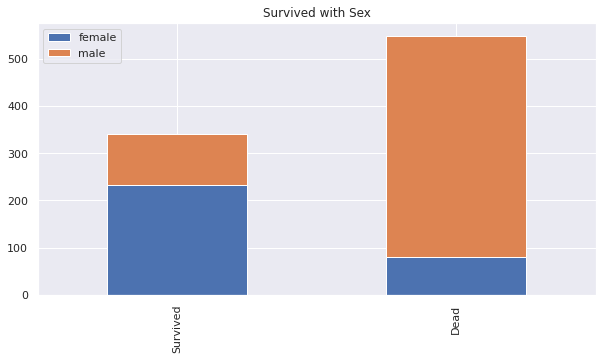

In [9]:
bar_chart('Sex')

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

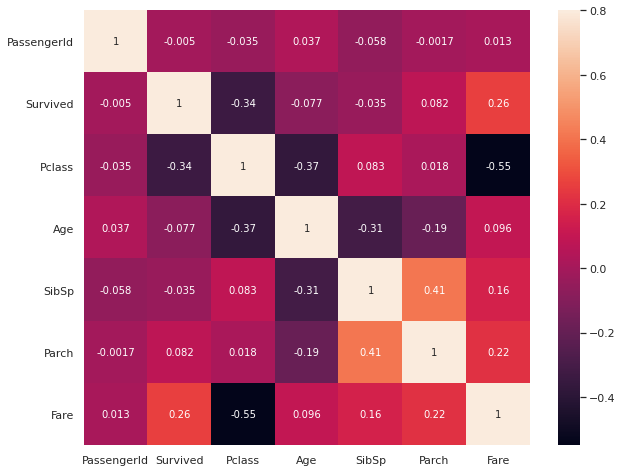

In [10]:
corrmat= train.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, vmax=0.8, annot=True)

abs(corrmat['Survived']).sort_values(ascending =False)

In [11]:
def facet_plot(feature, range_opt=None):
    facet = sns.FacetGrid(train, hue='Survived', aspect=4)
    facet.map(sns.kdeplot, feature, shade = True)

    if not range_opt:
        facet.set(xlim=(0, train[feature].max()))
    else:
        facet.set(xlim=range_opt)
    facet.add_legend()
    plt.title("Survived with "+feature)
    plt.show()

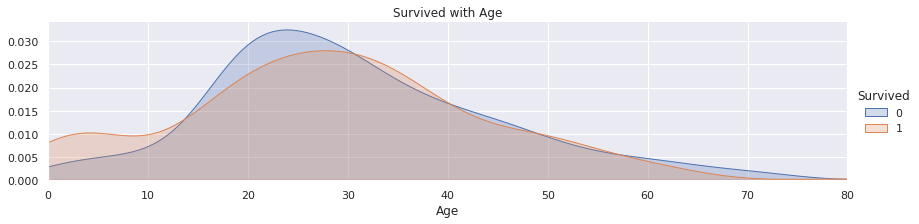

In [12]:
facet_plot('Age')

In [13]:
all_data.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [14]:
all_data.dtypes.value_counts()

object     5
int64      3
float64    2
dtype: int64

In [15]:
print("Train Y Label Data is {}".format(y_label.shape))
print("All Data is {}".format(all_data.shape))

Train Y Label Data is (891,)
All Data is (1309, 10)


## 2. Feature Engineering
### 2-1. Categorical + numerical features 분리하기
- using `select_dtypes()`
- numerical 데이터 중 month나 year 등의 데이터는 categorical로 분류해주기 `apply(str)`

In [16]:
all_data['Pclass']=all_data['Pclass'].apply(str)
print("Numerical Feature is {}".format(len(all_data.select_dtypes(exclude=object).columns)))
numerical_features = all_data.select_dtypes(exclude=object).columns
numerical_features

Numerical Feature is 4


Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [17]:
print("Categorical Feature is {}".format(len(all_data.select_dtypes(include=object).columns)))
categorical_features = all_data.select_dtypes(include=object).columns
categorical_features

Categorical Feature is 6


Index(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

### 2-2. 비어있는 missing 데이터 채우기  
- numerical: mean, median, mode 를 활용하여 데이터 채우기 `.fillna(xxx)`, `mean(), median(), mode()`
- categorical: `pd.get_dummies()` 나 `LabelEncoder`를 활용해서 missing 데이터도 없애고, one-hot encoding도 완성하기

In [18]:
all_data.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [19]:
# 숫자 데이터
all_data['Age'].fillna(all_data.groupby('Sex')['Age'].transform('median'), inplace=True)

In [20]:
# 숫자 데이터
all_data['Fare'].fillna(all_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [21]:
all_data.drop('Cabin',axis=1, inplace=True)
all_data.drop('Ticket',axis=1, inplace=True)
categorical_features=categorical_features.drop('Cabin')
categorical_features=categorical_features.drop('Ticket')

In [22]:
# 카테고리칼 데이터
all_data['Embarked'].fillna(all_data['Embarked'].value_counts().sort_values(ascending=False).index[0],inplace=True)

In [23]:
all_data['Name']=all_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [24]:
all_data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:
print("Missing(NA) Data is {}".format(all_data.isnull().values.sum()))

Missing(NA) Data is 0


`pd.get_dummies`로 categorical데이터 one-hot encoding 해주기

In [26]:
all_data=pd.get_dummies(all_data)

In [27]:
print("After fill and ONE-HOT encoding data shape is {}".format(all_data.shape))

After fill and ONE-HOT encoding data shape is (1309, 30)


### 2-3. data의 skewness 줄이기 
- y_label 데이터도 skewness 가 있으면 줄인다음에 학습하는 것이 학습결과에 이득: classifier 문제에서는 skewness를 확인할 수는 없지
- numerical data 의 skewness 줄이기  

skewness:
Index(['Fare', 'SibSp', 'Parch'], dtype='object')


Text(0.5, 1.0, 'Before skewness elimination using log1p')

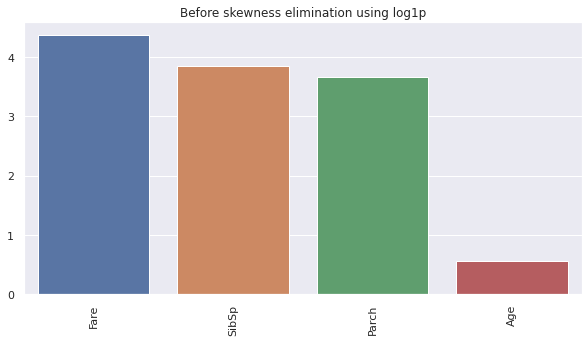

In [28]:
from scipy import stats
from scipy.stats import norm, skew # for some statistics

skewness = all_data[numerical_features].apply(lambda x: skew(x.dropna()))
skewness = skewness.sort_values(ascending=False)
skewness_features = skewness[abs(skewness.values)>1].index
print("skewness:")
print(skewness_features)

plt.figure(figsize=(10,5))
plt.xticks(rotation='90')
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Before skewness elimination using log1p')

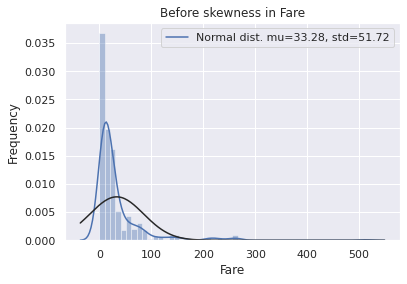

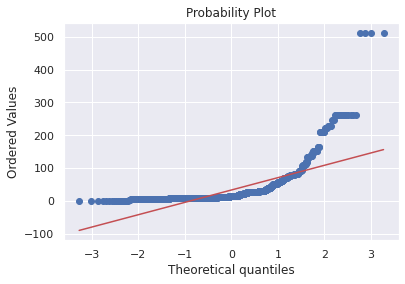

In [29]:
sns.distplot(all_data['Fare'], fit=norm)

(mu,sigma) = norm.fit(all_data['Fare'])
plt.legend(['Normal dist. mu={:.2f}, std={:.2f}'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Before skewness in Fare')

fig = plt.figure()
res = stats.probplot(all_data['Fare'], plot=plt)
plt.show()

In [30]:
import numpy as np

#Fare, SibSp, Parch

for col in skewness_features:
    all_data[col] = np.log1p(all_data[col])

Parch    1.787711
SibSp    1.634945
Age      0.552731
Fare     0.542519
dtype: float64


Text(0.5, 1.0, 'After skewness elimination using log1p')

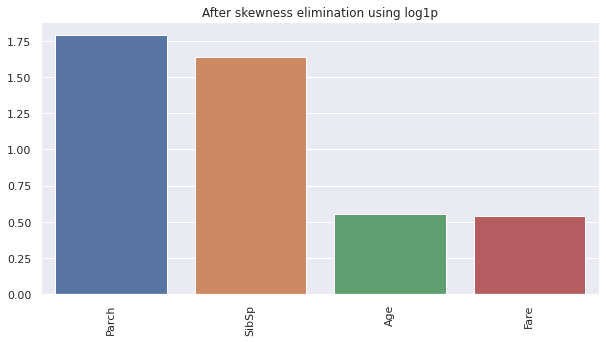

In [31]:
skewness = all_data[numerical_features].apply(lambda x: skew(x.dropna()))
skewness = skewness.sort_values(ascending=False)
print(skewness)

plt.figure(figsize=(10,5))
plt.xticks(rotation='90')
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('After skewness elimination using log1p')

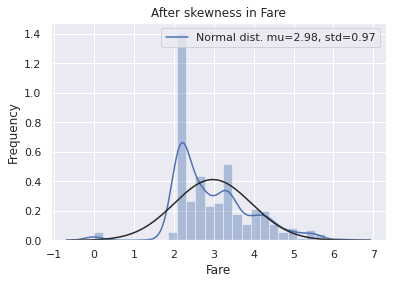

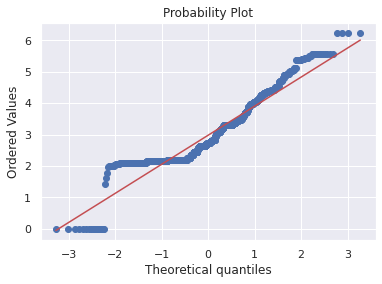

In [32]:
sns.distplot(all_data['Fare'], fit=norm)

(mu,sigma) = norm.fit(all_data['Fare'])
plt.legend(['Normal dist. mu={:.2f}, std={:.2f}'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('After skewness in Fare')


fig = plt.figure()
res = stats.probplot(all_data['Fare'], plot=plt)
plt.show()

### 2-4. new feature / del feature
- 필요하다면 하는 것이고, 여기선 하지 않겠다.

In [33]:
train_data = all_data[:n_train]
test_data = all_data[n_train:]

## 3. Modeling
- CrossValidation using `cross_val_score, KFold. train_test_split`.          
- Regressor : `LinearRegression, RidgeCV, LassoCV, ElasticNetCV` 
- Classifier  :  
    1) kNN (가까운 이웃)  
    2) Decision Tree (논리 순서)  
    3) Random Forest (논리 순서, 여러개 세트를 두고 다수결)  
    4) 베이지안 룰 (확률)  
    5) SVM (서포트 벡터 머신))  

- Techniques: `StandardScaler, RobustScaler`.
- Easy modeling: `make_pipeline`

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [36]:
kNN = make_pipeline(RobustScaler(),KNeighborsClassifier(n_neighbors=13) )
score = cross_val_score(kNN, train_data, y_label, cv= k_fold, n_jobs =1 , scoring='accuracy')
print(np.mean(score))

0.8047066167290886


In [37]:
RandomForest = make_pipeline(RobustScaler(),RandomForestClassifier(n_estimators=13) )
score = cross_val_score(RandomForest, train_data, y_label, cv= k_fold, n_jobs =1 , scoring='accuracy')
print(np.mean(score))

0.7979525593008739


In [38]:
Bayes = make_pipeline(RobustScaler(),GaussianNB())
score = cross_val_score(Bayes, train_data, y_label, cv= k_fold, n_jobs =1 ,  scoring='accuracy')
print(np.mean(score))

0.6971161048689138


In [45]:
SV_clf = make_pipeline(RobustScaler(),SVC())
score = cross_val_score(SV_clf, train_data, y_label, cv= k_fold, n_jobs =1 ,  scoring='accuracy')
print(np.mean(score))

0.8338826466916354


In [50]:
#   SVM 모델이 정확도가 제일 좋으니까 83%로,, 이걸로 예측을 하자!
clf =  make_pipeline(RobustScaler(),SVC())
clf.fit(train_data, y_label)
train_prediction = clf.predict(train_data)
test_prediction = clf.predict(test_data)

<AxesSubplot:>

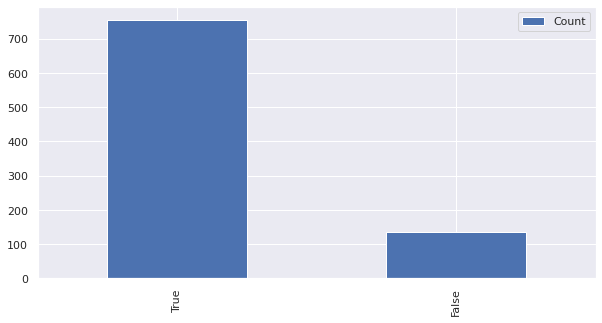

In [51]:
#plot between predicted values and label
error = abs(train_prediction - y_label)
error = pd.Series(error)
error = pd.DataFrame(error.value_counts().values, index=error.value_counts().index.map({0:"True", 1:"False"}), columns=['Count'])
error.plot(kind='bar', figsize=(10,5))

In [62]:
test_prediction=test_prediction.astype(np.int)

In [63]:
# 출력하기
submission = pd.DataFrame({"PassengerId": test['PassengerId'],
  "Survived": test_prediction})

submission.to_csv('submission_wook.csv',index=False)

In [64]:
submission = pd.read_csv('submission_wook.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## 끝